Image Data Commons is one of the largest cancer imaging databases in the world. It houses > 150 open-source datasets. This is a simple notebook to get started with exploring and downloading these datases. Here is the link to imaging data commons (https://portal.imaging.datacommons.cancer.gov/)

In [1]:
# Install idc-index toolkit to interact with IDC
!pip install idc-index --upgrade

  Using cached pyarrow-17.0.0-cp39-cp39-win_amd64.whl.metadata (3.4 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached charset_normalizer-3.3.2-cp39-cp39-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.8-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/57.3 MB ? eta -:--:--
   ------ --------------------------------- 9.2/57.3 MB 51.8 MB/s eta 0:00:01
   ---------------- ----------------------- 23.1/57.3 MB 58.3 MB/s eta 0:00:01
   -------------------------- ------------- 38.0/57.3 MB 61.9 MB/s eta 0:00:01
   --------------------------------- ------ 47.7/57.3 MB 61.9 MB/s eta 0:00:01
   -------

In [2]:
!pip install pydicom 

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 19.3 MB/s eta 0:00:00


In [2]:
from idc_index import index

client = index.IDCClient()
df = client.index
print(f"You are working with the IDC data release version {client.get_idc_version()}")
print(f"This is how many DICOM series we have in IDC: {len(client.index)}")
# List all the columns
print("\nThis is the information we have for each dicom series:")
print("\n".join(client.index.columns))

You are working with the IDC data release version v18
This is how many DICOM series we have in IDC: 897106

This is the information we have for each dicom series:
collection_id
analysis_result_id
PatientID
SeriesInstanceUID
StudyInstanceUID
source_DOI
PatientAge
PatientSex
StudyDate
StudyDescription
BodyPartExamined
Modality
Manufacturer
ManufacturerModelName
SeriesDate
SeriesDescription
SeriesNumber
instanceCount
license_short_name
series_aws_url
series_size_MB


In [3]:
# Get a list of all the collections / datasets on IDC
collections = client.get_collections()
print(collections)

['ispy2', 'covid_19_ny_sbu', 'qin_breast', 'rider_lung_pet_ct', 'tcga_blca', 'phantom_fda', 'naf_prostate', 'acrin_6698', 'ispy1', 'gbm_dsc_mri_dro', 'acrin_nsclc_fdg_pet', 'acrin_contralateral_breast_mr', 'cc_tumor_heterogeneity', 'cptac_cm', 'anti_pd_1_lung', 'remind', 'lung_pet_ct_dx', 'duke_breast_cancer_mri', 'cmb_lca', 'cptac_luad', 'pediatric_ct_seg', 'tcga_brca', 'lidc_idri', 'cptac_ucec', 'ea1141', 'covid_19_ar', 'prostate_anatomical_edge_cases', 'icdc_glioma', 'acrin_flt_breast', 'nlst', 'prostate_mri_us_biopsy', 'cmb_pca', 'nsclc_radiomics', 'prostate_fused_mri_pathology', '4d_lung', 'rider_pilot', 'tcga_kirp', 'rider_lung_ct', 'tcga_ov', 'vestibular_schwannoma_seg', 'breast_mri_nact_pilot', 'cptac_pda', 'tcga_thym', 'qiba_ct_1c', 'midrc_ricord_1c', 'cmb_gec', 'c4kc_kits', 'tcga_ucec', 'ct_phantom4radiomics', 'nsclc_radiogenomics', 'tcga_lihc', 'pancreatic_ct_cbct_seg', 'ct_vs_pet_ventilation_imaging', 'cmb_mel', 'upenn_gbm', 'pdmr_997537_175_t', 'soft_tissue_sarcoma', 'cpta

In [4]:
# Let's explore one of the collections

import numpy as np
df = client.index



# Let's look at one of the collections
ispy1_df = df[df['collection_id']=='pancreas_ct']
#print(ispy1_df.head())

# Let's look at all the columns
print(ispy1_df.columns)

# For the ISPY1 collection, let's list all the unique series descriptions
print(ispy1_df['SeriesDescription'].unique())
# Let's look at all the unique manufacturers
print(ispy1_df['Manufacturer'].unique())
# Let's look at all the unique manufacturer model names
print(ispy1_df['ManufacturerModelName'].unique())
# Unique study descriptions
print(ispy1_df['StudyDescription'].value_counts())
# # Unique Body Part Examined and number of each subtype
print(ispy1_df['BodyPartExamined'].value_counts())
print(len(ispy1_df['BodyPartExamined']))


# # Unique modalities
# print(ispy1_df['Modality'].unique())


Index(['collection_id', 'analysis_result_id', 'PatientID', 'SeriesInstanceUID',
       'StudyInstanceUID', 'source_DOI', 'PatientAge', 'PatientSex',
       'StudyDate', 'StudyDescription', 'BodyPartExamined', 'Modality',
       'Manufacturer', 'ManufacturerModelName', 'SeriesDate',
       'SeriesDescription', 'SeriesNumber', 'instanceCount',
       'license_short_name', 'series_aws_url', 'series_size_MB'],
      dtype='object')
['Pancreas']
[None]
[None]
StudyDescription
Pancreas    80
Name: count, dtype: int64
BodyPartExamined
PANCREAS    80
Name: count, dtype: int64
80


In [5]:
# Let's download one random image from a random series of a collection
df1 = df[df['collection_id']=='prostate_diagnosis']
#Let's look at all the unique series UID
series_list = df1['SeriesInstanceUID'].unique()
# Let's look at all unique patients
patient_list = df1['PatientID'].unique()

#print(patient_list,len(patient_list))

# Let's get the first patient / all patients
num=0
for patient in patient_list:
  patient_df = df1[df1['PatientID']==patient]
  #print(patient_df.head())

  series_list = patient_df['SeriesInstanceUID'].unique()
  print(series_list,len(series_list))

  # Download the images from the first series / all series
  client.download_from_selection(seriesInstanceUID=list(series_list)[:1],downloadDir=".")
  num+=1
  if(num==19):
    break

# Get size of df1
#print()


2024-09-11 15:59:36,123 - Total size of files to download: 11.02 MB
2024-09-11 15:59:36,125 - Total free space on disk: 166.777470976GB
2024-09-11 15:59:36,214 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:36,221 - Initial size of the directory: 0 bytes
2024-09-11 15:59:36,222 - Approximate size of the files that need to be downloaded: 11020000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.304523047148771388093492071302'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.199690111512675298729829940907'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.197934567792718687309397623544'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.139951296079702430315553650483'] 4


2024-09-11 15:59:37,260 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:37,285 - Total size of files to download: 2.85 MB
2024-09-11 15:59:37,286 - Total free space on disk: 166.777065472GB
2024-09-11 15:59:37,362 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:37,370 - Initial size of the directory: 0 bytes
2024-09-11 15:59:37,371 - Approximate size of the files that need to be downloaded: 2850000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.292505799514736540762698073233'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.286315844715139672333920012822'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.222892890053956552971072401339'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.232341657366439038958824396825'] 4


2024-09-11 15:59:38,393 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:38,417 - Total size of files to download: 46.27 MB
2024-09-11 15:59:38,418 - Total free space on disk: 166.774034432GB
2024-09-11 15:59:38,485 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:38,493 - Initial size of the directory: 0 bytes
2024-09-11 15:59:38,493 - Approximate size of the files that need to be downloaded: 46270000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.179607609340230703539937058078'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.995171284550605941266629021714'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.787614115185057274379408288868'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.627847242029833719400640937336'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.188757075250219592782000297793'] 5


2024-09-11 15:59:40,984 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:41,009 - Total size of files to download: 46.28 MB
2024-09-11 15:59:41,011 - Total free space on disk: 166.726148096GB
2024-09-11 15:59:41,078 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:41,088 - Initial size of the directory: 0 bytes
2024-09-11 15:59:41,089 - Approximate size of the files that need to be downloaded: 46280000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4793.2002.520666648839310237528102714449'
 '1.3.6.1.4.1.14519.5.2.1.4793.2002.351217563611002260072596658180'
 '1.3.6.1.4.1.14519.5.2.1.4793.2002.125050485176983247643381631432'
 '1.3.6.1.4.1.14519.5.2.1.4793.2002.107812470524402925377801368675'] 4


2024-09-11 15:59:43,184 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:43,212 - Total size of files to download: 8.34 MB
2024-09-11 15:59:43,213 - Total free space on disk: 166.678585344GB
2024-09-11 15:59:43,296 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:43,308 - Initial size of the directory: 0 bytes
2024-09-11 15:59:43,309 - Approximate size of the files that need to be downloaded: 8340000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.315500046717708004469324123389'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.727003984933040647016737005893'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.229913814498264977835403918384'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.316815071910356509029933837081'] 4


2024-09-11 15:59:44,336 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:44,365 - Total size of files to download: 43.54 MB
2024-09-11 15:59:44,365 - Total free space on disk: 166.670135296GB
2024-09-11 15:59:44,431 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:44,440 - Initial size of the directory: 0 bytes
2024-09-11 15:59:44,441 - Approximate size of the files that need to be downloaded: 43540000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.110035730183019192646975113182'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.374103389997445025478257817439'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.280500537279773417377484947262'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.124252342264412458893612569172'] 4


2024-09-11 15:59:46,635 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:46,662 - Total size of files to download: 3.24 MB
2024-09-11 15:59:46,664 - Total free space on disk: 166.625050624GB
2024-09-11 15:59:46,740 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:46,751 - Initial size of the directory: 0 bytes
2024-09-11 15:59:46,751 - Approximate size of the files that need to be downloaded: 3240000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.981473048116322310500645375931'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.282565053421581806912945907603'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.231130709903087305529739013225'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.298266279315485073430814787893'] 4


2024-09-11 15:59:47,788 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:47,824 - Total size of files to download: 10.37 MB
2024-09-11 15:59:47,826 - Total free space on disk: 166.62163456GB
2024-09-11 15:59:47,903 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:47,914 - Initial size of the directory: 0 bytes
2024-09-11 15:59:47,916 - Approximate size of the files that need to be downloaded: 10370000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4793.2002.239083321702886636813044670215'
 '1.3.6.1.4.1.14519.5.2.1.4793.2002.267499280788154949833792160479'
 '1.3.6.1.4.1.14519.5.2.1.4793.2002.353389317987816212565168968065'
 '1.3.6.1.4.1.14519.5.2.1.4793.2002.403681089464429841613810091130'] 4


2024-09-11 15:59:48,947 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:48,971 - Total size of files to download: 3.56 MB
2024-09-11 15:59:48,973 - Total free space on disk: 166.61096448GB
2024-09-11 15:59:49,043 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:49,050 - Initial size of the directory: 0 bytes
2024-09-11 15:59:49,052 - Approximate size of the files that need to be downloaded: 3560000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.136237263416420865661412627627'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.789092899086384303743266100217'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.273440923919861682726662866085'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.481199289778859998130471754803'] 4


2024-09-11 15:59:50,086 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:50,111 - Total size of files to download: 10.36 MB
2024-09-11 15:59:50,113 - Total free space on disk: 166.606856192GB
2024-09-11 15:59:50,220 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:50,228 - Initial size of the directory: 0 bytes
2024-09-11 15:59:50,228 - Approximate size of the files that need to be downloaded: 10360000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.333470820253967416678667688866'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.166355817513191678028885755698'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.154497742916397143125887895484'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.114936237745787660256654935400'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.222670508954246125855524820719'] 5


2024-09-11 15:59:51,261 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:51,290 - Total size of files to download: 9.2 MB
2024-09-11 15:59:51,291 - Total free space on disk: 166.595956736GB
2024-09-11 15:59:51,368 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:51,380 - Initial size of the directory: 0 bytes
2024-09-11 15:59:51,381 - Approximate size of the files that need to be downloaded: 9200000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.127563190669026999212427980023'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.135215208763799330769861656170'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.205934944462345762738640119798'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.140937679842214631471858106374'] 4


2024-09-11 15:59:52,413 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:52,435 - Total size of files to download: 7.5 MB
2024-09-11 15:59:52,436 - Total free space on disk: 166.586556416GB
2024-09-11 15:59:52,506 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:52,515 - Initial size of the directory: 0 bytes
2024-09-11 15:59:52,516 - Approximate size of the files that need to be downloaded: 7500000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.259594049602661211336503173477'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.153752417195366933216135241383'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.134600853307327773628207704283'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.335594724744259400748508982246'] 4


2024-09-11 15:59:53,544 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:53,567 - Total size of files to download: 9.19 MB
2024-09-11 15:59:53,568 - Total free space on disk: 166.578884608GB
2024-09-11 15:59:53,634 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:53,642 - Initial size of the directory: 0 bytes
2024-09-11 15:59:53,644 - Approximate size of the files that need to be downloaded: 9190000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.138568597473950291455035977038'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.242742826237099500444317897544'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.125151948848665379072488609662'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.139189354359311968901003104339'] 4


2024-09-11 15:59:54,678 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:54,709 - Total size of files to download: 6.25 MB
2024-09-11 15:59:54,711 - Total free space on disk: 166.569484288GB
2024-09-11 15:59:54,795 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:54,805 - Initial size of the directory: 0 bytes
2024-09-11 15:59:54,806 - Approximate size of the files that need to be downloaded: 6250000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.125057153700387467955103544370'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.130946942771026147141070841308'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.252205767869028915832467058637'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.198926941656306408880901189680'] 4


2024-09-11 15:59:55,837 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:55,865 - Total size of files to download: 9.4 MB
2024-09-11 15:59:55,866 - Total free space on disk: 166.563065856GB
2024-09-11 15:59:55,942 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:55,951 - Initial size of the directory: 0 bytes
2024-09-11 15:59:55,952 - Approximate size of the files that need to be downloaded: 9400000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4794.2002.296062355048754672453230898891'
 '1.3.6.1.4.1.14519.5.2.1.4794.2002.209663928312609746750413241615'
 '1.3.6.1.4.1.14519.5.2.1.4794.2002.778333602240440712239598993798'
 '1.3.6.1.4.1.14519.5.2.1.4794.2002.228699852449693015937349066275'] 4


2024-09-11 15:59:56,981 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:57,007 - Total size of files to download: 43.56 MB
2024-09-11 15:59:57,008 - Total free space on disk: 166.553387008GB
2024-09-11 15:59:57,093 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:57,103 - Initial size of the directory: 0 bytes
2024-09-11 15:59:57,104 - Approximate size of the files that need to be downloaded: 43560000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.727735256877336162302251027683'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.175492353944764831041697633058'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.523592568102509675900287398622'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.118345253816286128242031682957'] 4


2024-09-11 15:59:59,175 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 15:59:59,202 - Total size of files to download: 7.5 MB
2024-09-11 15:59:59,205 - Total free space on disk: 166.508068864GB
2024-09-11 15:59:59,284 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 15:59:59,295 - Initial size of the directory: 0 bytes
2024-09-11 15:59:59,296 - Approximate size of the files that need to be downloaded: 7500000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.333119361560687171613120760161'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.150834028463666948631600522204'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.307082999458222300408384358590'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.195021477429874371845161500116'] 4


2024-09-11 16:00:00,322 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 16:00:00,345 - Total size of files to download: 43.55 MB
2024-09-11 16:00:00,346 - Total free space on disk: 166.500462592GB
2024-09-11 16:00:00,419 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 16:00:00,427 - Initial size of the directory: 0 bytes
2024-09-11 16:00:00,427 - Approximate size of the files that need to be downloaded: 43550000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.219029436909684290928415007344'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.148137869445831755643163530435'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.333543716804240843843588251488'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.309282478337520532602717307688'] 4


2024-09-11 16:00:02,585 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project
2024-09-11 16:00:02,613 - Total size of files to download: 2.85 MB
2024-09-11 16:00:02,615 - Total free space on disk: 166.455590912GB
2024-09-11 16:00:02,699 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-11 16:00:02,708 - Initial size of the directory: 0 bytes
2024-09-11 16:00:02,709 - Approximate size of the files that need to be downloaded: 2850000.0 bytes


['1.3.6.1.4.1.14519.5.2.1.4792.2002.233470901341719714648314743720'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.448669710529908229140570733660'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.330916021870307879105983554883'
 '1.3.6.1.4.1.14519.5.2.1.4792.2002.254776894649441466640979172758'] 4


2024-09-11 16:00:03,735 - Successfully downloaded files to C:\Users\nikhi\Desktop\UTD-Projects\Population_Health_Project


By default, the files are downloaded into a folder hierarchy that is organized as `collection_id` > `PatientID` > `StudyInstanceUID` > `Modality`_`SeriesInstanceUID`

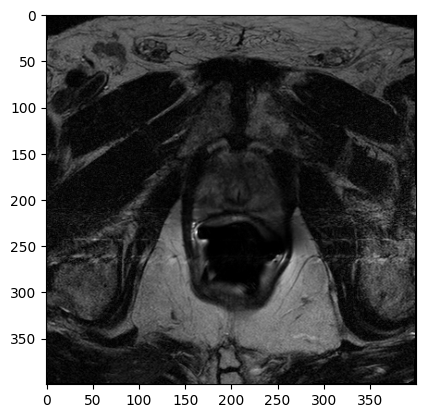

In [12]:
# You can download a random image from this dataset

import pydicom
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# Load the DICOM file
dicom_path = r'1f86a477-2af7-4ea7-8384-400d716c46fa.dcm'

dicom_data = pydicom.dcmread(dicom_path)

# Get the pixel array from the DICOM file
pixel_array = dicom_data.pixel_array

# Normalize the pixel values to the range [0, 255]
pixel_array = pixel_array - np.min(pixel_array)
pixel_array = (pixel_array / np.max(pixel_array) * 255).astype(np.uint8)

# Convert the NumPy array to a PIL Image
image = Image.fromarray(pixel_array)
plt.imshow(image,cmap="gray")
plt.show()


In [14]:
print(dicom_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.4792.2002.282933548048301333761943517031
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20090922'
(0008, 0013) Instance Creation Time              TM: '104953'
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.14519.5.2.1.4792.